<a href="https://colab.research.google.com/github/ARTAA123/TelecomX_alura/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom X - Análisis de Evasión de Clientes



Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.
¿Qué vas a practicar?

✅ Importar y manipular datos desde una API de manera eficiente.

✅ Aplicar los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.

✅ Crear visualizaciones estratégicas para identificar patrones y tendencias.

✅ Realizar un Análisis Exploratorio de Datos (EDA) y generar un informe con insights relevantes.

¡Ahora es tu turno! 🚀 Usa tus conocimientos para transformar datos en información estratégica y ayudar a Telecom X a retener más clientes.

#📌 Extracción

In [1]:
#link del json con los datos
url ='https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

### Importación de la información desde una url y normalización de las columnas

In [2]:
import pandas as pd
import requests

response = requests.get(url)
data = response.json()
data = pd.json_normalize(data)
data

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [3]:
print(data.isnull().sum())

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [4]:
print((data.isnull().sum() / len(data)) * 100)

customerID                   0.0
Churn                        0.0
customer.gender              0.0
customer.SeniorCitizen       0.0
customer.Partner             0.0
customer.Dependents          0.0
customer.tenure              0.0
phone.PhoneService           0.0
phone.MultipleLines          0.0
internet.InternetService     0.0
internet.OnlineSecurity      0.0
internet.OnlineBackup        0.0
internet.DeviceProtection    0.0
internet.TechSupport         0.0
internet.StreamingTV         0.0
internet.StreamingMovies     0.0
account.Contract             0.0
account.PaperlessBilling     0.0
account.PaymentMethod        0.0
account.Charges.Monthly      0.0
account.Charges.Total        0.0
dtype: float64


#🔧 Transformación

¿Qué debes hacer?

✅ Explorar las columnas del dataset y verificar sus tipos de datos.

✅ Consultar el diccionario para comprender mejor el significado de las variables.

✅ Identificar las columnas más relevantes para el análisis de evasión.

### Exploración del dataframe

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [6]:
print(data.columns)

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')


### Consulta del diccionario para comprensión de las variables

In [7]:
data.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


### Comprobación de incoherencias en los datos

In [8]:
pd.unique(data['customerID'])

array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object)

In [9]:
pd.unique(data['Churn'])

array(['No', 'Yes', ''], dtype=object)

In [10]:
pd.unique(data['account.Charges.Total'])

array(['593.3', '542.4', '280.85', ..., '742.9', '4627.65', '3707.6'],
      dtype=object)

In [11]:
pd.unique(data['account.Contract'])

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [12]:
pd.unique(data['account.PaymentMethod'])

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [13]:
pd.unique(data['account.Charges.Monthly'])

array([65.6 , 59.9 , 73.9 , ..., 91.75, 68.8 , 67.85])

In [14]:
data.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


### Transformación de los datos

In [15]:
#Transformación de columnas Si y No a 1 y 0 binarios
binarias = [
    'Churn', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService',
    'account.PaperlessBilling',
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'
    ]
for col in binarias:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   float64
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   int64  
 5   customer.Dependents        7267 non-null   int64  
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   int64  
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    5686 non-null   float64
 11  internet.OnlineBackup      5686 non-null   float64
 12  internet.DeviceProtection  5686 non-null   float64
 13  internet.TechSupport       5686 non-null   float

In [17]:
#Transformar cusstomer.SeniorCitizen a tipo booleano
data['customer.SeniorCitizen'] = data['customer.SeniorCitizen'].astype(bool)

In [18]:
#Transformación de los datos sobre multipleLines
#Si dice no phone cambia a no y se transforma a binario
data['phone.MultipleLines'] = data['phone.MultipleLines'].replace('No phone service', 'No')
data['phone.MultipleLines'] = data['phone.MultipleLines'].map({'Yes': 1, 'No': 0})

In [19]:
# Manejo especial para columnas con "No internet service"
cols_internet = [
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'
]
for col in cols_internet:
    data[col] = data[col].replace('No internet service', 'No')

In [20]:
#Transformación de Charges a numeric
data['account.Charges.Total'] = pd.to_numeric(data['account.Charges.Total'], errors='coerce')

In [21]:
#Comprobación de los cambios
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   float64
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   bool   
 4   customer.Partner           7267 non-null   int64  
 5   customer.Dependents        7267 non-null   int64  
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   int64  
 8   phone.MultipleLines        7267 non-null   int64  
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    5686 non-null   float64
 11  internet.OnlineBackup      5686 non-null   float64
 12  internet.DeviceProtection  5686 non-null   float64
 13  internet.TechSupport       5686 non-null   float

In [22]:
data['account.Charges.Total'].isna().sum()

np.int64(11)

In [23]:
data['account.Charges.Monthly'].isna().sum()

np.int64(0)

In [24]:
#Comprueba si los datos en cargos totales se deben a que son nuevos clientes
check =data.loc[(data['account.Charges.Total'].isna()) & (data['customer.tenure'] == 0), 'account.Charges.Total'] = 0
check

0

In [25]:
datos_clientes_data_faltantes = data.loc[data['account.Charges.Total'].isna()]
datos_clientes_data_faltantes

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total


In [26]:
data.shape

(7267, 21)

In [27]:
data

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0.0,Female,False,1,1,9,1,0,DSL,...,1.0,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.60,593.30
1,0003-MKNFE,0.0,Male,False,0,0,9,1,1,DSL,...,0.0,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.90,542.40
2,0004-TLHLJ,1.0,Male,False,0,0,4,1,0,Fiber optic,...,0.0,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1.0,Male,True,1,0,13,1,0,Fiber optic,...,1.0,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1.0,Female,True,1,0,3,1,0,Fiber optic,...,0.0,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0.0,Female,False,0,0,13,1,0,DSL,...,0.0,0.0,1.0,0.0,0.0,One year,0,Mailed check,55.15,742.90
7263,9992-RRAMN,1.0,Male,False,1,0,22,1,1,Fiber optic,...,0.0,0.0,0.0,0.0,1.0,Month-to-month,1,Electronic check,85.10,1873.70
7264,9992-UJOEL,0.0,Male,False,0,0,2,1,0,DSL,...,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,50.30,92.75
7265,9993-LHIEB,0.0,Male,False,1,1,67,1,0,DSL,...,0.0,1.0,1.0,0.0,1.0,Two year,0,Mailed check,67.85,4627.65


In [28]:
data['Churn'] = data['Churn'].fillna(0).astype(int)

In [29]:
data

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0,Female,False,1,1,9,1,0,DSL,...,1.0,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.60,593.30
1,0003-MKNFE,0,Male,False,0,0,9,1,1,DSL,...,0.0,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.90,542.40
2,0004-TLHLJ,1,Male,False,0,0,4,1,0,Fiber optic,...,0.0,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,True,1,0,13,1,0,Fiber optic,...,1.0,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,True,1,0,3,1,0,Fiber optic,...,0.0,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,False,0,0,13,1,0,DSL,...,0.0,0.0,1.0,0.0,0.0,One year,0,Mailed check,55.15,742.90
7263,9992-RRAMN,1,Male,False,1,0,22,1,1,Fiber optic,...,0.0,0.0,0.0,0.0,1.0,Month-to-month,1,Electronic check,85.10,1873.70
7264,9992-UJOEL,0,Male,False,0,0,2,1,0,DSL,...,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,50.30,92.75
7265,9993-LHIEB,0,Male,False,1,1,67,1,0,DSL,...,0.0,1.0,1.0,0.0,1.0,Two year,0,Mailed check,67.85,4627.65


In [30]:
#Rellenar valores nulos y transformarlos a int
datos_transformar =['internet.OnlineBackup','internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies']
for col in datos_transformar:
    data[col] = data[col].fillna(0).astype(int)

In [31]:
data

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0,Female,False,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.60,593.30
1,0003-MKNFE,0,Male,False,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40
2,0004-TLHLJ,1,Male,False,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,True,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,True,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,False,0,0,13,1,0,DSL,...,0,0,1,0,0,One year,0,Mailed check,55.15,742.90
7263,9992-RRAMN,1,Male,False,1,0,22,1,1,Fiber optic,...,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70
7264,9992-UJOEL,0,Male,False,0,0,2,1,0,DSL,...,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7265,9993-LHIEB,0,Male,False,1,1,67,1,0,DSL,...,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65


In [32]:
pd.unique(data['internet.InternetService'])

array(['DSL', 'Fiber optic', 'No'], dtype=object)

### Creación de columna cuentas diarias

Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [33]:
#Toma los datos de "account.Charges.Monthly" genera el cargo diario y se redondea a dos decimales
data['Cuentas_Diarias'] = (data['account.Charges.Monthly'] / 30).round(2)

In [34]:
data

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,False,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,0,Male,False,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,1,Male,False,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,1,Male,True,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,1,Female,True,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,False,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,1,Male,False,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,0,Male,False,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,0,Male,False,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.26


In [35]:
data.rename(columns={
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'CiudadanoSenior',
    'customer.Partner': 'TienePareja',
    'customer.Dependents': 'TieneDependientes',
    'internet.InternetService': 'ServicioInternet',
    'account.Charges.Monthly': 'FacturacionMensual',
    'account.Charges.Total': 'FacturacionTotal',
    'account.Contract': 'TipoContrato'
}, inplace=True)
data

,customerID,Churn,Genero,CiudadanoSenior,TienePareja,TieneDependientes,customer.tenure,phone.PhoneService,phone.MultipleLines,ServicioInternet,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,TipoContrato,account.PaperlessBilling,account.PaymentMethod,FacturacionMensual,FacturacionTotal,Cuentas_Diarias
0,0002-ORFBO,0,Female,False,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,0,Male,False,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,1,Male,False,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,1,Male,True,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,1,Female,True,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,False,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,1,Male,False,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,0,Male,False,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,0,Male,False,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.26


In [36]:
data.rename(columns={
    'phone.PhoneService': 'ServicioTelefonico',
    'account.PaymentMethod': 'MetodoPago',
    'internet.OnlineSecurity': 'SeguridadEnLinea',
    'internet.OnlineBackup': 'BackupEnLinea',
    'internet.DeviceProtection': 'ProteccionEnLinea',
    'internet.TechSupport': 'SoporteTecnico',
    'internet.StreamingTV': 'StreamingTV',
    'internet.StreamingMovies': 'StreamingPeliculas',
    'account.PaperlessBilling': 'FacturacionElectronica',
    'phone.MultipleLines': 'MultiplesLineas'
}, inplace=True)
data

,customerID,Churn,Genero,CiudadanoSenior,TienePareja,TieneDependientes,customer.tenure,ServicioTelefonico,MultiplesLineas,ServicioInternet,...,ProteccionEnLinea,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturacionElectronica,MetodoPago,FacturacionMensual,FacturacionTotal,Cuentas_Diarias
0,0002-ORFBO,0,Female,False,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,0,Male,False,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,1,Male,False,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,1,Male,True,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,1,Female,True,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,False,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,1,Male,False,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,0,Male,False,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,0,Male,False,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.26


In [37]:
data.rename(columns={
    'customer.tenure': 'Permanenciadelcliente'
}, inplace=True)
data

,customerID,Churn,Genero,CiudadanoSenior,TienePareja,TieneDependientes,Permanenciadelcliente,ServicioTelefonico,MultiplesLineas,ServicioInternet,...,ProteccionEnLinea,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturacionElectronica,MetodoPago,FacturacionMensual,FacturacionTotal,Cuentas_Diarias
0,0002-ORFBO,0,Female,False,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,0,Male,False,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,1,Male,False,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,1,Male,True,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,1,Female,True,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,False,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,1,Male,False,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,0,Male,False,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,0,Male,False,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.26


#📊 Carga y análisis

### Análisis descriptivo

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [38]:
data.describe()

,Churn,TienePareja,TieneDependientes,Permanenciadelcliente,ServicioTelefonico,MultiplesLineas,SeguridadEnLinea,BackupEnLinea,ProteccionEnLinea,SoporteTecnico,StreamingTV,StreamingPeliculas,FacturacionElectronica,FacturacionMensual,FacturacionTotal,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,5686.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.484106,0.300124,32.346498,0.902711,0.421770,0.365459,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.157292
std,0.437115,0.499782,0.458343,24.571773,0.296371,0.493876,0.481601,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.180000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.340000
75%,1.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


### Distribución de evasión

Description

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

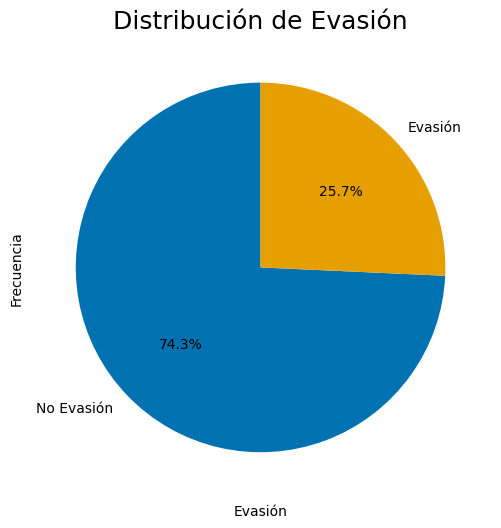

In [42]:
#Uso de grafico "pie" porciones para observar la distribuición de evación de clientes
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.pie(data['Churn'].value_counts(), labels=['No Evasión', 'Evasión'], autopct='%1.1f%%', startangle=90, colors = ['#0072B2', '#E69F00'])
plt.xlabel('Evasión')
plt.ylabel('Frecuencia')
plt.title('Distribución de Evasión', fontsize=18)
plt.show()

El gráfico muestra que un 25.7 % de los clientes de TelecomX han optado por cancelar su servicio, mientras que el 74.3 % permanece activo.
Esta distribución sugiere una tasa de retención relativamente alta, aunque el porcentaje de bajas (churn) sigue siendo relevante y merece atención para identificar posibles causas y oportunidades de mejora.

Nota: Se utilizaron colores optimizados para accesibilidad, lo que garantiza una mejor interpretación incluso para personas con deficiencia visual.


### Recuento de evasión por variables categóricas

Description

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.]

In [84]:
total_datos =data['Churn'].value_counts().sum()

In [83]:
def leyenda(numero1, numero2):
    # Cambiar etiquetas de la leyenda
    handles, labels = ax[numero1, numero2].get_legend_handles_labels()
    new_labels = ['No', 'Sí'] if set(labels) == {f'{numero1}', f'{numero2}'} or set(labels) == {numero1, numero2} else labels
    ax[numero1, numero2].legend(handles, new_labels, title='Evasión')

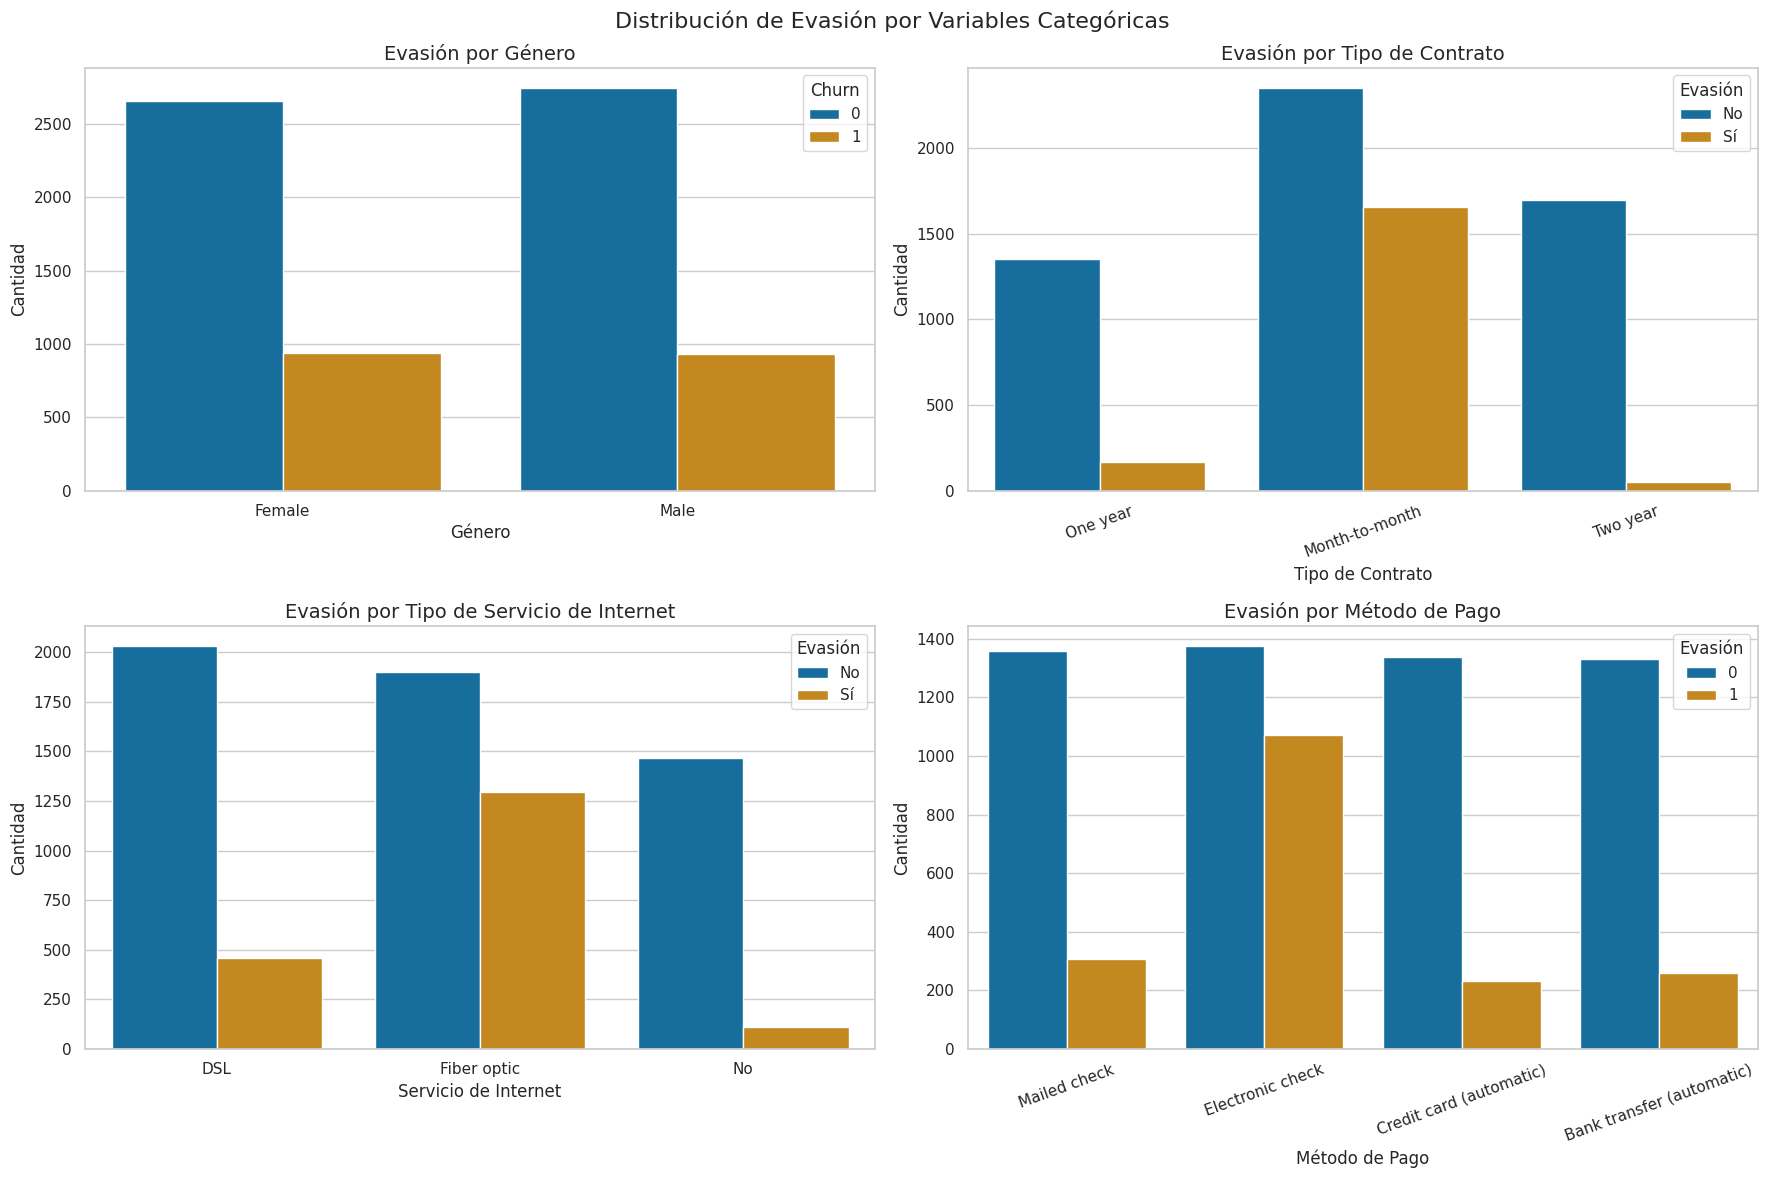

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Estilo accesible
sns.set(style="whitegrid", palette="colorblind")

# Crear figura y ejes
fig, ax = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Distribución de Evasión por Variables Categóricas', fontsize=16)
# Primer gráfico: Género vs Churn
sns.countplot(x='Genero', hue='Churn', data=data, ax=ax[0, 0])
ax[0, 0].set_title('Evasión por Género', fontsize=14)
ax[0, 0].set_xlabel('Género')
ax[0, 0].set_ylabel('Cantidad')


# Segundo gráfico: Tipo de Contrato vs Churn
sns.countplot(x='TipoContrato', hue='Churn', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Evasión por Tipo de Contrato', fontsize=14)
ax[0, 1].set_xlabel('Tipo de Contrato')
ax[0, 1].set_ylabel('Cantidad')
ax[0, 1].tick_params(axis='x', rotation=20)
leyenda(0,1)


# Tercer gráfico: Servicio de Internet vs Churn
sns.countplot(x='ServicioInternet', hue='Churn', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Evasión por Tipo de Servicio de Internet', fontsize=14)
ax[1, 0].set_xlabel('Servicio de Internet')
ax[1, 0].set_ylabel('Cantidad')
leyenda(1, 0)

# Cuarto gráfico: Método de Pago vs Churn
sns.countplot(x='MetodoPago', hue='Churn', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Evasión por Método de Pago', fontsize=14)
ax[1, 1].set_xlabel('Método de Pago')
ax[1, 1].set_ylabel('Cantidad')
ax[1, 1].tick_params(axis='x', rotation=20)
leyenda(1, 1)

# Ajuste del espacio
plt.tight_layout()
plt.show()

En esta sección, analizamos cómo varía la tasa de evasión (churn) según diferentes características demográficas y contractuales de los clientes.

Los gráficos de barras permiten visualizar las diferencias entre quienes permanecen con el servicio y quienes lo han cancelado, segmentados por:

    Género: No se observan diferencias significativas entre hombres y mujeres respecto a la evasión.

    Tipo de contrato: Los contratos mensuales presentan una tasa de cancelación considerablemente mayor, en comparación con los contratos anuales o bianuales. Esto sugiere que el tipo de contrato influye fuertemente en la retención.
    Servicio de Internet: Los clientes con Fiber optic tienen una tasa de evasión más alta. Es importante analizar si esto se relaciona con problemas de calidad del servicio o expectativas no cumplidas.

    Método de pago: Quienes pagan con cheque electrónico muestran mayor propensión a cancelar, en comparación con métodos automáticos como tarjeta de crédito o transferencia bancaria.

Este análisis revela perfiles de riesgo más propensos a darse de baja, lo que puede ser útil para diseñar acciones preventivas específicas. Por ejemplo, ofrecer incentivos para cambiar a contratos de mayor duración o automatizar los pagos podría reducir la evasión.

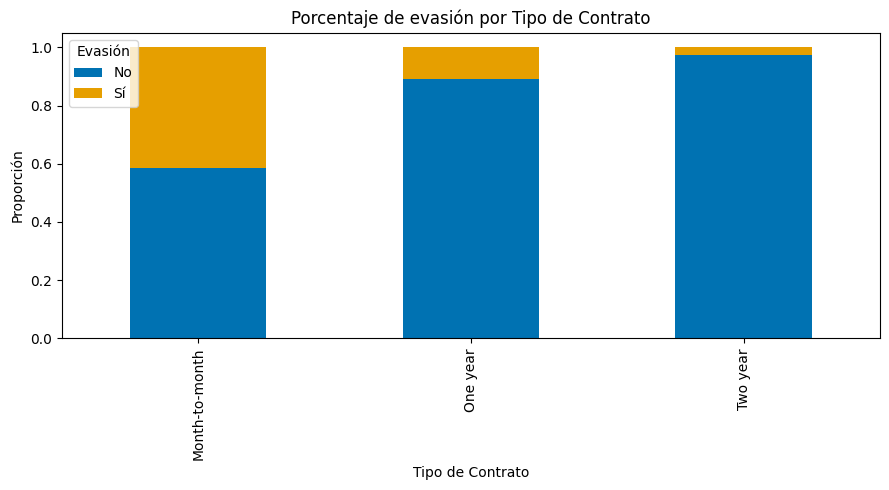

In [77]:
import pandas as pd

# Ejemplo con 'TipoContrato'
porcentaje_churn = data.groupby('TipoContrato')['Churn'].value_counts(normalize=True).unstack()

# Gráfico de barras apiladas
porcentaje_churn.plot(kind='bar', stacked=True, color=['#0072B2', '#E69F00'], figsize=(9,5))
plt.title('Porcentaje de evasión por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Proporción')
plt.legend(title='Evasión', labels=['No', 'Sí'])
plt.tight_layout()
plt.show()

Al analizar los datos que arrojan el gráfico anterior se observo que el contrato con mayor duración es el que presenta la mayor retención de usuarios, y el contrato de mes a mes es el que presenta el mayor porcentaje de clientes que se van de la suscrición con un

In [ ]:
print(data.columns)

### Conteo de evasión por variables numéricas

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

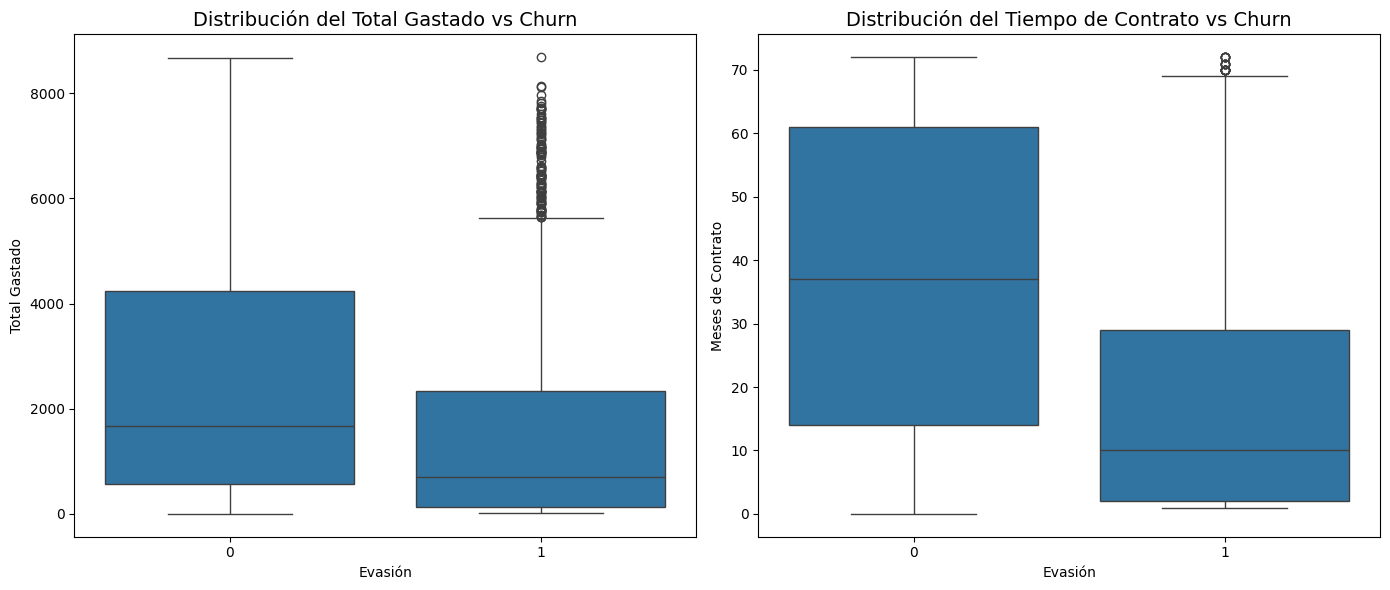

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Total gastado por cliente vs Churn
sns.boxplot(x='Churn', y='FacturacionTotal', data=data, ax=axes[0])
axes[0].set_title('Distribución del Total Gastado vs Churn', fontsize=14)
axes[0].set_ylabel('Total Gastado')
axes[0].set_xlabel('Evasión')

# Gráfico 2: Tiempo de contrato vs Churn
sns.boxplot(x='Churn', y='Permanenciadelcliente', data=data, ax=axes[1])
axes[1].set_title('Distribución del Tiempo de Contrato vs Churn', fontsize=14)
axes[1].set_ylabel('Meses de Contrato')
axes[1].set_xlabel('Evasión')

plt.tight_layout()
plt.show()


Al analizar la distribución del total gastado por los clientes en relación con la evasión (Churn), se observa una tendencia clara:

    Los clientes que han gastado más tienden a permanecer más tiempo con la empresa, mientras que aquellos con menor gasto presentan una mayor tasa de cancelación.
    Esto sugiere que el valor económico del cliente podría estar asociado a su lealtad o satisfacción con el servicio.

En cuanto al tiempo de contrato, el análisis muestra que:

    La probabilidad de evasión disminuye conforme aumenta la duración del contrato.
    Es decir, los clientes con mayor antigüedad en la empresa presentan tasas de cancelación más bajas, lo cual podría indicar que superar los primeros meses es clave para la retención.

### Extra: ¡Extra! Análisis de correlación entre variables

Description

Esta actividad es un extra, por lo tanto es OPCIONAL.

Como un paso adicional, puedes explorar la correlación entre diferentes variables del dataset. Esto puede ayudar a identificar qué factores tienen mayor relación con la evasión de clientes, como:

🔹 La relación entre la cuenta diaria y la evasión.

🔹 Cómo la cantidad de servicios contratados afecta la probabilidad de churn.

Puedes usar la función corr() de Pandas para calcular las correlaciones y visualizar los resultados con gráficos de dispersión o matrices de correlación.

Este análisis adicional puede proporcionar insights valiosos para la creación de modelos predictivos más robustos. 🚀

In [44]:
# Copiar del DataFrame original para análisis
df_corr = data.copy()

In [45]:
df_corr

,customerID,Churn,Genero,CiudadanoSenior,TienePareja,TieneDependientes,Permanenciadelcliente,ServicioTelefonico,MultiplesLineas,ServicioInternet,...,ProteccionEnLinea,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturacionElectronica,MetodoPago,FacturacionMensual,FacturacionTotal,Cuentas_Diarias
0,0002-ORFBO,0,Female,False,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,0,Male,False,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,1,Male,False,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,1,Male,True,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,1,Female,True,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,False,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,1,Male,False,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,0,Male,False,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,0,Male,False,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.26


In [46]:
correlation_matrix = df_corr.corr(numeric_only=True)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


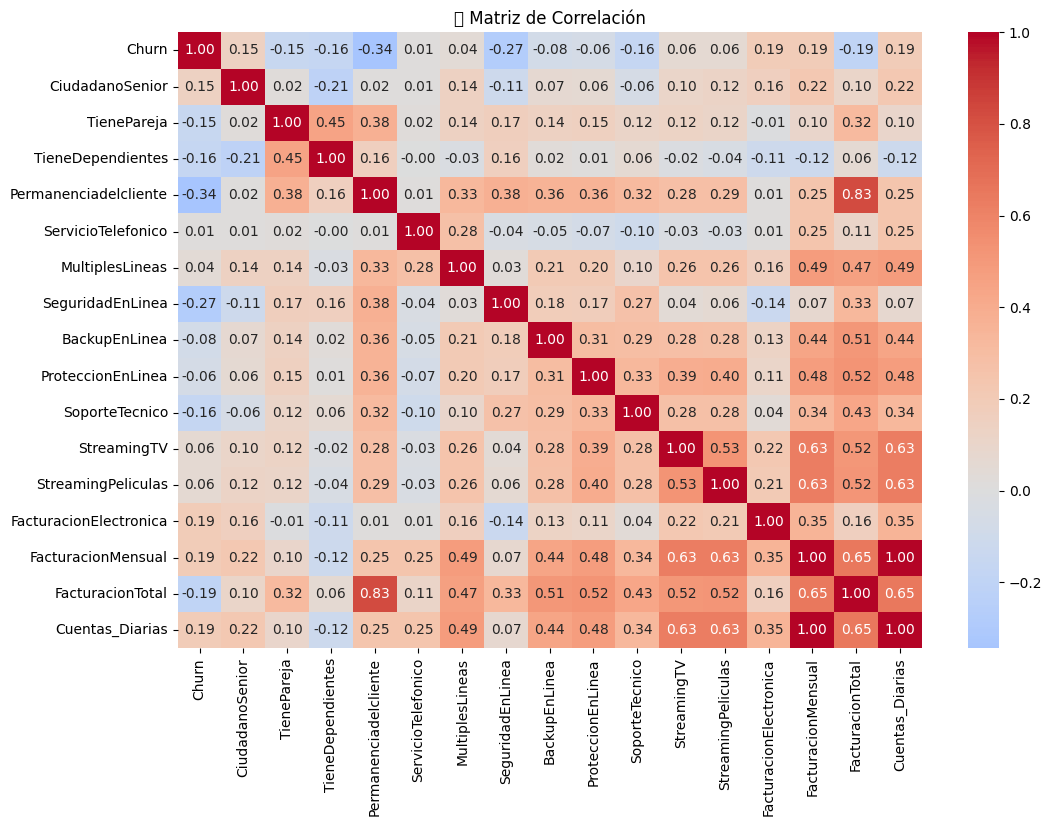

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('🔍 Matriz de Correlación')
plt.show()

In [48]:
# Ordenar por correlación con Churn
correlation_with_churn = correlation_matrix['Churn'].sort_values(ascending=False)
print(correlation_with_churn)

Churn                     1.000000
Cuentas_Diarias           0.189918
FacturacionMensual        0.189866
FacturacionElectronica    0.186666
CiudadanoSenior           0.146733
StreamingTV               0.062430
StreamingPeliculas        0.060586
MultiplesLineas           0.039343
ServicioTelefonico        0.012571
ProteccionEnLinea        -0.063452
BackupEnLinea            -0.080163
TienePareja              -0.148546
SoporteTecnico           -0.160440
TieneDependientes        -0.161384
FacturacionTotal         -0.193345
SeguridadEnLinea         -0.274097
Permanenciadelcliente    -0.344079
Name: Churn, dtype: float64


| Variable                | Correlación | Interpretación                                                                                                  |
| ----------------------- | ----------- | --------------------------------------------------------------------------------------------------------------- |
| `Permanenciadelcliente` | **-0.3441** | Cuanto más tiempo ha permanecido el cliente, **menos probable es que se dé de baja**. (Relación negativa clara) |
| `SeguridadEnLinea`      | -0.2741     | Los clientes con seguridad en línea tienen menos probabilidad de churn.                                         |
| `FacturacionTotal`      | -0.1933     | Clientes que han facturado más en total tienden a quedarse.                                                     |
| `TieneDependientes`     | -0.1613     | Tener dependientes está asociado a menos churn.                                                                 |
| `SoporteTecnico`        | -0.1604     | Tener soporte técnico reduce levemente la probabilidad de churn.                                                |
| `TienePareja`           | -0.1485     | Tener pareja se relaciona con menor churn.                                                                      |


In [57]:
NumServices = ['ServicioTelefonico',
       'MultiplesLineas', 'ServicioInternet', 'SeguridadEnLinea',
       'BackupEnLinea', 'ProteccionEnLinea', 'SoporteTecnico', 'StreamingTV',
       'StreamingPeliculas']

In [59]:
df_corr

,customerID,Churn,Genero,CiudadanoSenior,TienePareja,TieneDependientes,Permanenciadelcliente,ServicioTelefonico,MultiplesLineas,ServicioInternet,...,ProteccionEnLinea,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturacionElectronica,MetodoPago,FacturacionMensual,FacturacionTotal,Cuentas_Diarias
0,0002-ORFBO,0,Female,False,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,0,Male,False,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,1,Male,False,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,1,Male,True,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,1,Female,True,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,False,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,1,Male,False,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,0,Male,False,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,0,Male,False,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.26


In [62]:
df_corr['ServicioInternet'] =df_corr['ServicioInternet'].apply(lambda x: 1 if x == 'Fiber optic' or x== 'DSL' else 0)

In [65]:
df_corr['NumServicios'] = df_corr[NumServices].sum(axis=1)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


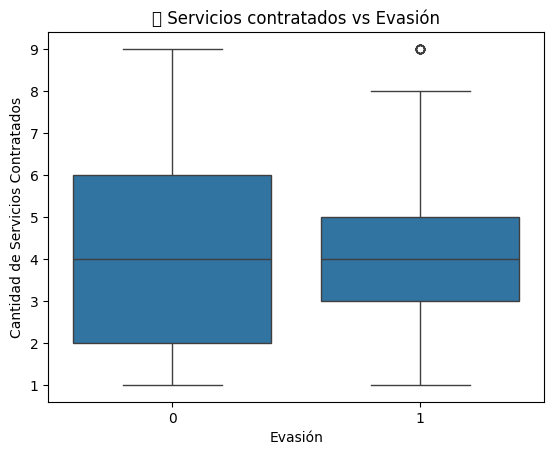

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de cajas
sns.boxplot(x='Churn', y='NumServicios', data=df_corr)
plt.title('📦 Servicios contratados vs Evasión')
plt.xlabel('Evasión')
plt.ylabel('Cantidad de Servicios Contratados')
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127931 (\N{VIOLIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


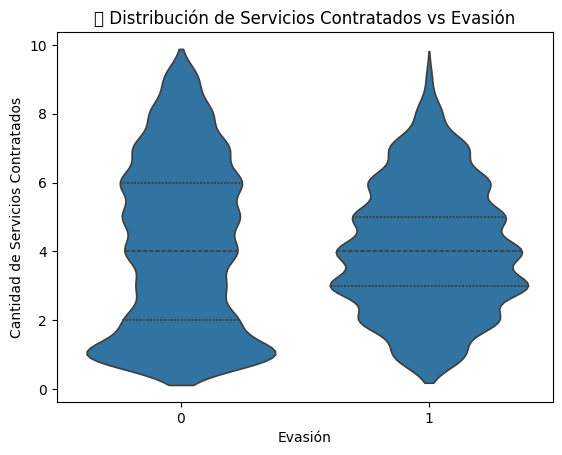

In [69]:
sns.violinplot(x='Churn', y='NumServicios', data=df_corr, inner='quartile')
plt.title('🎻 Distribución de Servicios Contratados vs Evasión')
plt.xlabel('Evasión')
plt.ylabel('Cantidad de Servicios Contratados')
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


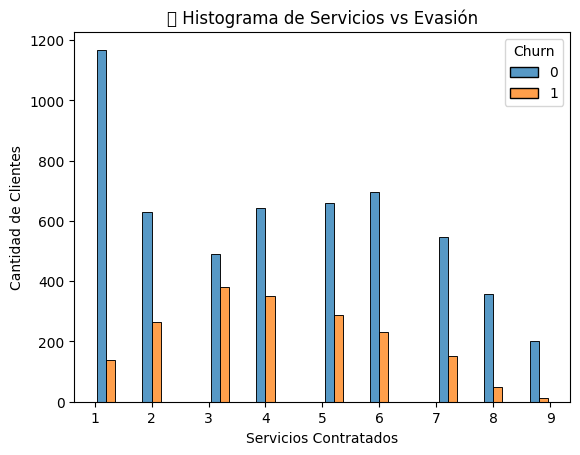

In [73]:
sns.histplot(data=df_corr, x='NumServicios', hue='Churn', multiple='dodge', shrink=0.8)
plt.title('📊 Histograma de Servicios vs Evasión')
plt.xlabel('Servicios Contratados')
plt.ylabel('Cantidad de Clientes')
plt.show()

La mayor parte de quienes cancelaron tienen entre 2 y 5 servicios.

Es menos común que un cliente con 8 o 9 servicios cancele.

In [75]:
df_corr['NumServicios'].groupby(df_corr['Churn']).value_counts()

Churn  NumServicios
0      1.0             1168
       6.0              697
       5.0              661
       4.0              642
       2.0              630
       7.0              547
       3.0              491
       8.0              359
       9.0              203
1      3.0              380
       4.0              352
       5.0              289
       2.0              266
       6.0              232
       7.0              152
       1.0              138
       8.0               49
       9.0               11
Name: count, dtype: int64

---

# 📊 Informe Final – Análisis de Evasión de Clientes (Churn) en Telecom X

---

## 🔹 1. Introducción

Telecom X se enfrenta a un problema crítico: una tasa significativa de cancelación de clientes. Este fenómeno, conocido como **Churn**, puede afectar directamente los ingresos y la sostenibilidad del negocio.

El presente análisis tiene como objetivo **identificar patrones y factores asociados a la evasión de clientes**, utilizando un enfoque de ciencia de datos. A través del procesamiento, visualización y análisis de los datos disponibles, buscamos extraer insights valiosos que puedan respaldar la toma de decisiones estratégicas para **reducir la fuga de clientes y mejorar la retención**.

---

## 🔹 2. Limpieza y Tratamiento de Datos

Se importaron los datos desde una fuente JSON alojada en GitHub y se llevó a cabo un proceso exhaustivo de transformación, que incluyó:

* ✅ **Normalización de columnas** con estructura jerárquica (por ejemplo, `customer.gender`).
* ✅ Conversión de variables binarias ('Yes'/'No') a valores numéricos (`1`/`0`).
* ✅ Conversión de campos numéricos almacenados como texto (`account.Charges.Total`) a tipo `float`.
* ✅ Relleno de valores nulos en campos como `Churn`, `account.Charges.Total` y servicios de internet.
* ✅ Creación de nuevas variables:

  * **`Cuentas_Diarias`**: valor diario estimado a partir de la facturación mensual.
  * **`NumServicios`**: conteo de servicios contratados por cliente.

Estas transformaciones permitieron preparar un dataset coherente y listo para el análisis exploratorio.

---




## 🔹 3. Análisis Exploratorio de Datos (EDA)

Se realizó una exploración visual y estadística que permitió identificar relaciones entre la evasión de clientes y diversas variables del dataset.

### 🎯 Distribución general de evasión:

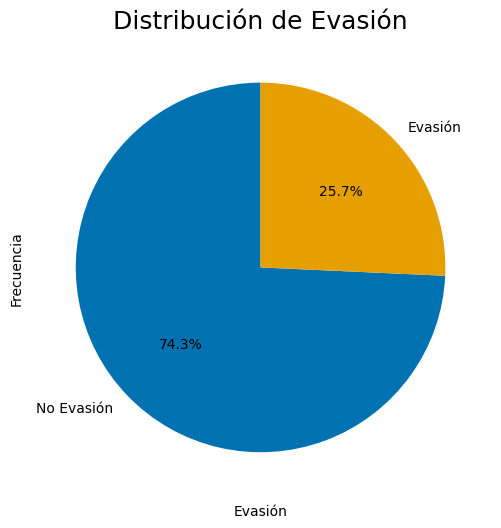

In [76]:
#Uso de grafico "pie" porciones para observar la distribuición de evación de clientes
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.pie(data['Churn'].value_counts(), labels=['No Evasión', 'Evasión'], autopct='%1.1f%%', startangle=90, colors = ['#0072B2', '#E69F00'])
plt.xlabel('Evasión')
plt.ylabel('Frecuencia')
plt.title('Distribución de Evasión', fontsize=18)
plt.show()

* **Churn**: \~25.7% de los clientes han cancelado el servicio.

### 📌 Variables categóricas y churn:

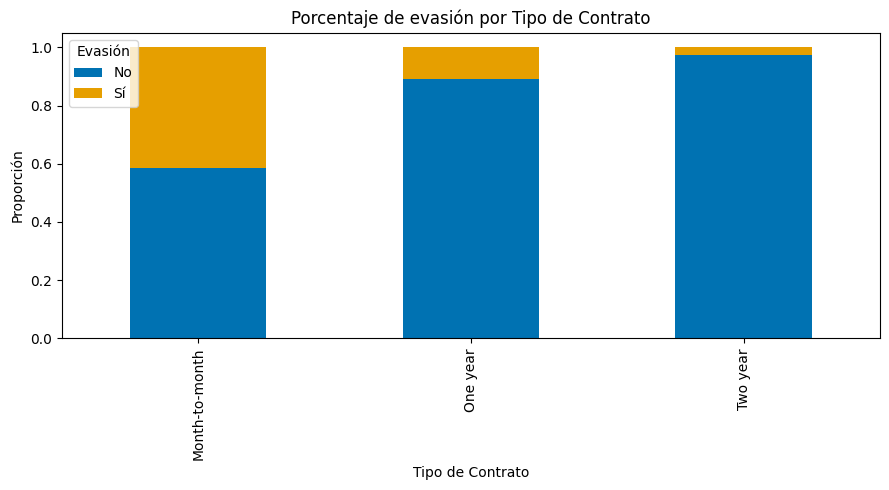

In [78]:
import pandas as pd

# Ejemplo con 'TipoContrato'
porcentaje_churn = data.groupby('TipoContrato')['Churn'].value_counts(normalize=True).unstack()

# Gráfico de barras apiladas
porcentaje_churn.plot(kind='bar', stacked=True, color=['#0072B2', '#E69F00'], figsize=(9,5))
plt.title('Porcentaje de evasión por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Proporción')
plt.legend(title='Evasión', labels=['No', 'Sí'])
plt.tight_layout()
plt.show()

* Los clientes con un contrato **mensual** presentaron una tasa de cancelación mucho mayor que aquellos con contratos anuales o bianuales.

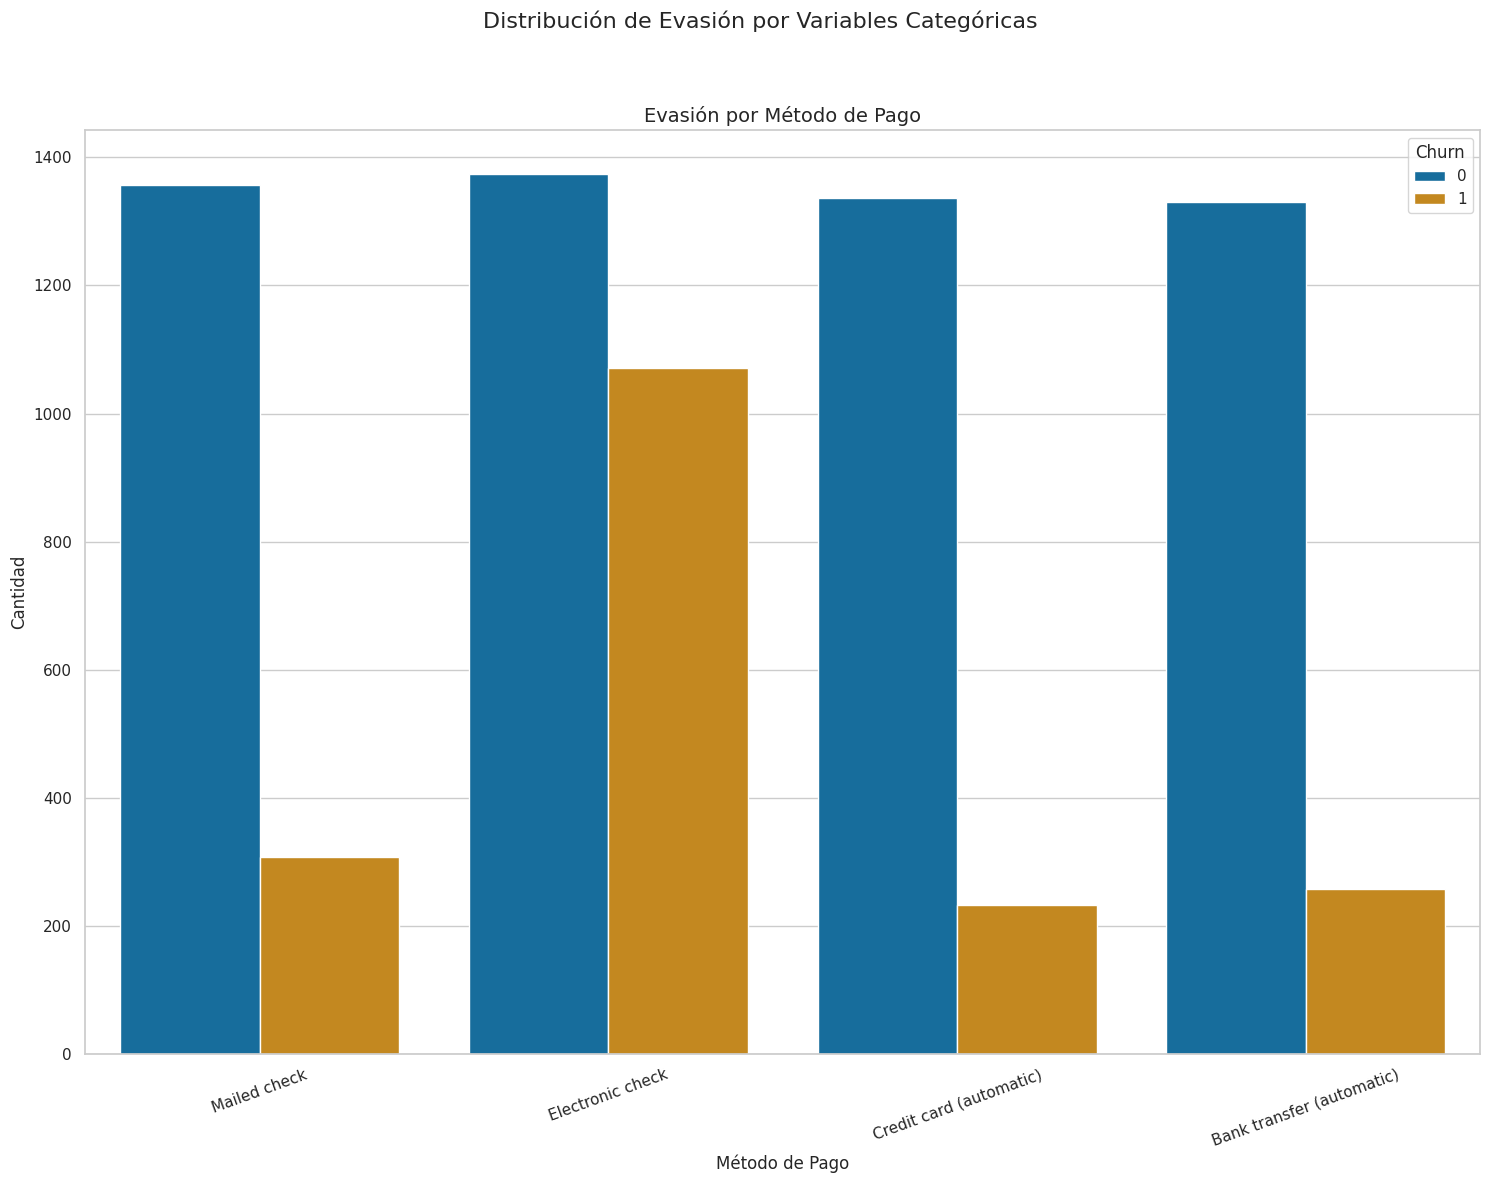

In [89]:
fig, ax = plt.subplots(figsize=(18, 12))
fig.suptitle('Distribución de Evasión por Variables Categóricas', fontsize=16)
# Cuarto gráfico: Método de Pago vs Churn
sns.countplot(x='MetodoPago', hue='Churn', data=data, ax=ax)
ax.set_title('Evasión por Método de Pago', fontsize=14)
ax.set_xlabel('Método de Pago')
ax.set_ylabel('Cantidad')
ax.tick_params(axis='x', rotation=20)

* Los métodos de pago como **"cheque electrónico"** se relacionaron con mayor churn.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


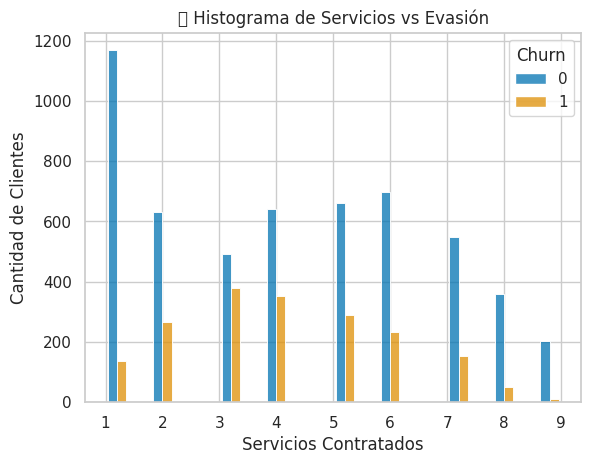

In [90]:
sns.histplot(data=df_corr, x='NumServicios', hue='Churn', multiple='dodge', shrink=0.8)
plt.title('📊 Histograma de Servicios vs Evasión')
plt.xlabel('Servicios Contratados')
plt.ylabel('Cantidad de Clientes')
plt.show()

* **Clientes sin servicios adicionales de internet** (seguridad, backup, soporte, etc.) mostraron mayor probabilidad de evasión.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


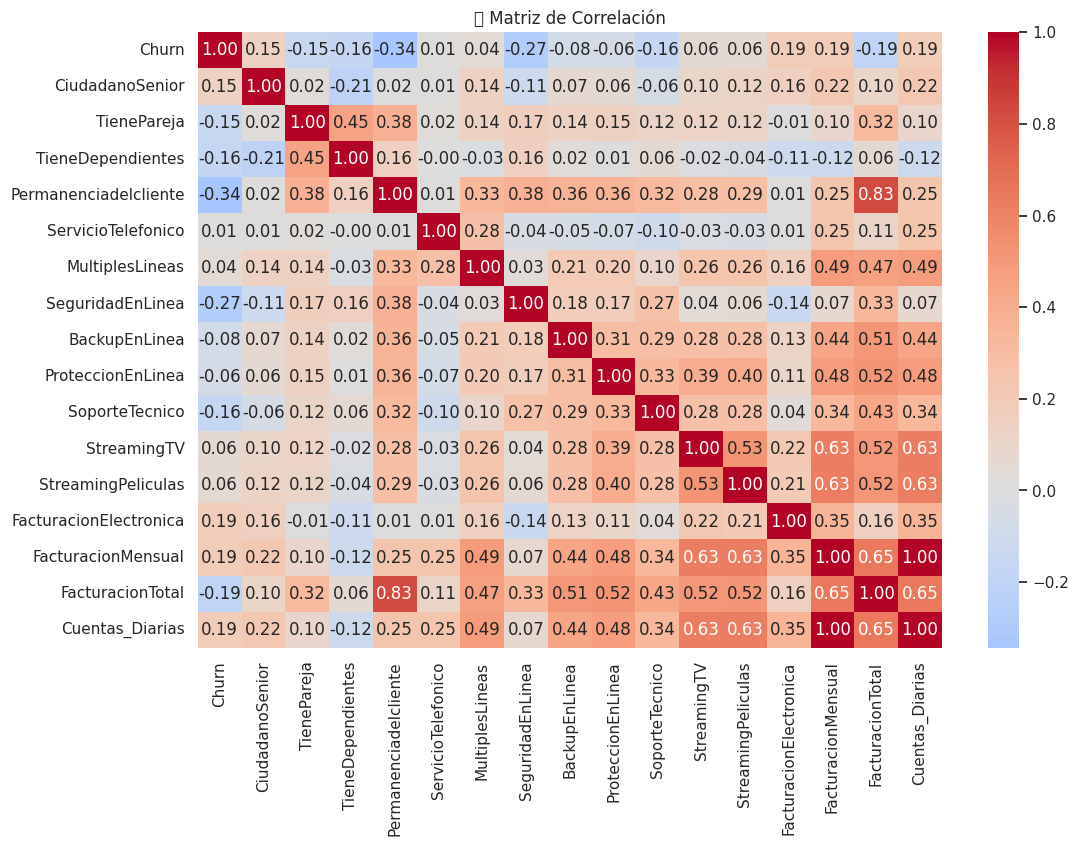

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('🔍 Matriz de Correlación')
plt.show()

### 📌 Variables numéricas y churn:

* Clientes con **menor facturación total** y **menor permanencia** son más propensos a cancelar.
* Existe una correlación negativa fuerte entre **tiempo de permanencia** y **Churn** (-0.34).
* La **facturación diaria** y mensual tienen correlaciones positivas con churn, pero moderadas (\~0.19), indicando una tendencia, pero no concluyente.

### 📦 Cantidad de servicios contratados:

* Clientes con pocos servicios (1 a 3) tienen mayor probabilidad de cancelar.
* Los usuarios con **más de 6 servicios contratados** rara vez cancelan, mostrando una **mayor lealtad**.


## 🔹 4. Conclusiones e Insights

* **Contratos de corto plazo** están fuertemente asociados con churn.
* **Servicios complementarios de internet** actúan como factores de fidelización.
* Los **clientes con menor antigüedad y gasto total** son el grupo más vulnerable.
* La **diversificación de servicios** mejora significativamente la retención.
* Algunos métodos de pago pueden indicar una menor fidelización (cheques electrónicos).

---


## 🔹 5. Recomendaciones Estratégicas

Con base en los hallazgos, se proponen las siguientes estrategias para mitigar la evasión:

1. **Fomentar la migración a contratos de largo plazo** con incentivos o descuentos.
2. **Promocionar paquetes de servicios combinados** (internet + streaming + soporte) para aumentar el valor percibido.
3. **Implementar alertas tempranas** para clientes nuevos o con pocos servicios que muestran patrones de riesgo.
4. **Incentivar métodos de pago automáticos** (transferencia o tarjeta) con beneficios asociados.
5. **Realizar campañas personalizadas** a clientes con baja facturación o permanencia para mejorar su experiencia.

---